# TP 3.1 : Test de Student

Nous nous intéressons ici au test de Student de comparaison des moyennes sur 2 échantillons indépendants simulés selon des lois normales de même variance $\sigma^2 > 0$,
\begin{equation*}
X_1,\dots,X_p \sim \mathcal{N}(m_X,\sigma^2) \quad \text{et} \quad Y_1,\dots,Y_q \sim \mathcal{N}(m_Y,\sigma^2).
\end{equation*}
Pour expérimenter, nous prendrons $p=q=10$, $m_X=m_Y=0$ et $\sigma^2=1$.

In [105]:
# Génération des échantillons
x <- rnorm(10)
y <- rnorm(10)

Le test bilatéral de comparaison des moyennes sur ces 2 échantillons se fait en utilisant la fonction `t.test()` avec l'option `var.equal=TRUE`.

In [106]:
# Test bilatéral de comparaison des moyennes
resultat_test <- t.test(x, y, var.equal=TRUE)

# L'objet obtenu contient beaucoup d'informations
resultat_test


	Two Sample t-test

data:  x and y
t = 1.3244, df = 18, p-value = 0.2019
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.3699819  1.6319853
sample estimates:
mean of x mean of y 
0.9085388 0.2775371 


<div class="alert alert-block alert-success">
    Utilisez la cellule suivante pour répondre aux questions :
    <ol>
        <li>Donner l'hypothèse nulle $H_0$ et l'hypothèse alternative $H_1$ de ce test.</li>
        <li>Pourquoi faut-il supposer que les deux échantillons aient la même variance ? En particulier, quelle est la loi de la variable
            \begin{equation*}
                (p+q-2)\frac{\tilde{\sigma}^2_{p,q}}{\sigma^2} \quad \text{où} \quad \tilde{\sigma}^2_{p,q} = \frac{1}{p+q-2}\sum_{k=1}^p\left( X_k - \bar{X}_p \right)^2 + \frac{1}{p+q-2}\sum_{k=1}^q\left( Y_k - \bar{Y}_q \right)^2\ ?
            \end{equation*}
        </li>
        <li>En déduire la loi de la statistique de test
            \begin{equation*}
                T = \sqrt{\frac{pq}{p+q}} \times \frac{\bar{X}_p - \bar{Y}_q}{\sqrt{\tilde{\sigma}^2_{p,q}}}.
            \end{equation*}
        </li>
        <li>Vérifier le calcul de la statistique de test donné dans <code>resultat_test</code>.</li>
        <li>Quelle est la p-valeur du test <code>resultat_test</code> ? Pour un niveau de 95%, doit-on accepter ou rejeter $H_0$ ? Est-ce cohérent avec notre simulation initiale ?</li>
        <li>Recalculer cette p-valeur à partir d'une loi de Student à 18 degrés de liberté.</li>
    </ol>
</div>

1
H0 : mu_x = mu_y
H1 : mu_x != mu_y

2
Il faut supposer que les deux échantillons ont la meme variance car la somme des carrés des deux échantillons n'est plus proportionnelle à une même 
σ^2
Les deux sommes suivent des lois de (sigma^2 Khi2) avec comme paramètre p - 1 et q - 1. comme la variables sont indépendantes ET que c'est la meme variance, on peut dire que la somme des deux sommes suit une loi sigma^2 Khi2(p+q-2)

En remplaçant on obtient que la loi de la variable est un Khi2(p+q-2)

3
<center><img src="img/Screen1.png"></center>

In [107]:
p <- length(x); q <- length(x)
barX <- mean(x); barY <- mean(y)
SSx <- sum((x - barX)^2); SSy <- sum((y - barY)^2)
tilde_sigma2 <- (SSx + SSy)/(p+q-2)
T <- sqrt(p*q/(p+q))*(barX - barY)/sqrt(tilde_sigma2)
df <- p+q-2
p_value <- 2 * pt(-abs(T), df)

# affichage de la statistique de test
print(resultat_test$statistic)
print(T)

# affichage des p-values
cat("1")
p_value
cat("2")
print(resultat_test$p.value)

       t 
1.324383 
[1] 1.324383
1

[1] 0.201947

2[1] 0.201947


comme la P value est supérieur au alpha (0.05), on ne rejette PAS H0
Moyen mnemo technique (p<alpha  -> on rejette une H0 <-> on rejette si la Proposition de salaire est plusfaible par rapport aux attentes (alpha))

In [108]:
#6
p_value_df18 <- 2 * pt(-abs(T), df = 18)
p_value_df18


[1] 0.201947

Pour illustrer la notion de niveau d'un test, nous simulons 1000 paires d'échantillons de taille 10 comme ci-dessus et nous les stockons dans deux matrices `X` et `Y`.

In [109]:
X <- matrix(rnorm(1000*10), nrow=1000)
Y <- matrix(rnorm(1000*10), nrow=1000)

<div class="alert alert-block alert-success">
    Utilisez la cellule suivante pour répondre aux questions :
    <ol>
        <li>Effectuer un test de comparaison des moyennes pour chaque paire d'échantillons et stocker la p-valeur du résultat dans un vecteur <code>p_valeur</code> de taille 1000.</li>
        <li>Combien de p-valeurs inférieures à 0.05 obtenez-vous ? Combien devriez-vous théoriquement en obtenir en moyenne ?</li>
        <li>Repérer l'indice du test qui donne la plus petite p-valeur (il peut être utile d'utiliser la fonction <code>which.min()</code>). Pour un niveau de 95%, doit-on accepter ou rejeter $H_0$ pour ce test ?</li>
        <li>Représenter graphiquement les données correspondant à ce test :
            <ul>
                <li>afficher la densité de la loi normale centrée réduite entre -3 et 3 avec <code>plot(dnorm, -3, 3, type="l")</code>,</li>
                <li>afficher les deux échantillons avec deux couleurs différentes grâce à la fonction <code>rug()</code>,</li>
                <li>afficher les moyennes des deux échantillons (fonction <code>rug()</code>),</li>
                <li>ajouter une légende.</li>
            </ul>
            <center><img src="img/student.png"></center>
        </li>
    </ol>
</div>

In [110]:
#1
p_valeur <- numeric(1000)
for (i in 1:1000) {
  
  res <- t.test(X[i,], Y[i,], var.equal = TRUE)
  p_valeur[i] <- res$p.value
}

# print(p_valeur)

In [111]:
#2
sum(p_valeur < 0.05)/sum(p_valeur<2)

[1] 0.058

On retrouve bien qu'il y a a peu pres 5% des p_valeurs pour laquel le test ne va pas conclure

In [112]:
i_min <- which.min(p_valeur)
p_valeur[i_min]

[1] 0.001615393

Pour ce test comme 0.00043 < 5 on doit rejeter H0

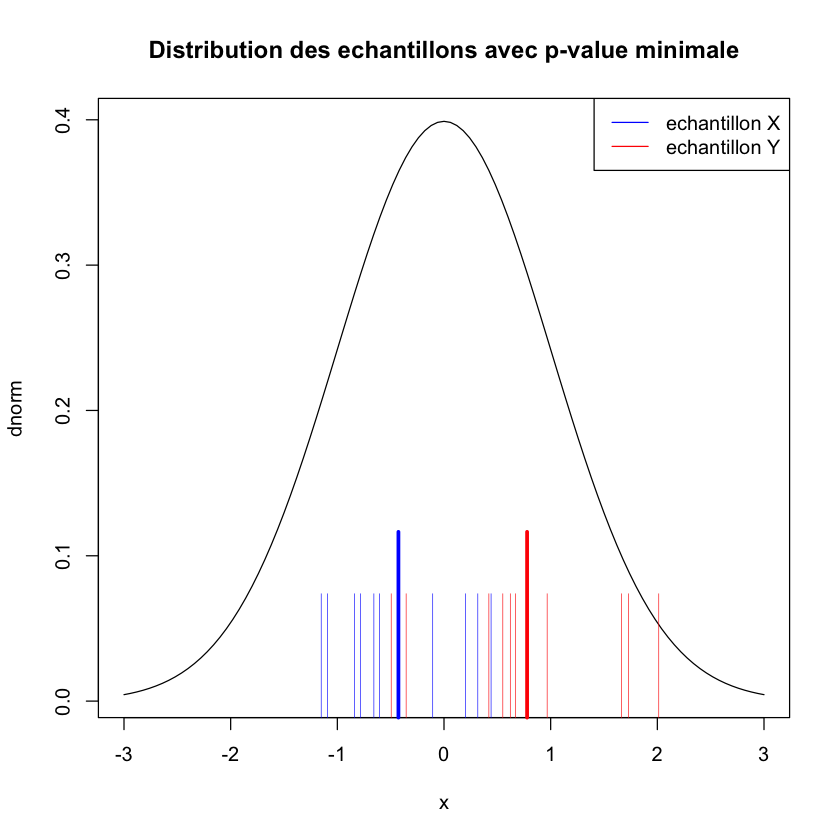

In [113]:
plot(dnorm, -3, 3, type="l", main = "Distribution des echantillons avec p-value minimale")

rug(X[i_min,], col = "blue", ticksize = 0.2 )
rug(Y[i_min,], col = "red", ticksize = 0.2)

rug(mean(X[i_min,]), col = "blue", lwd = 3, ticksize = 0.3)
rug(mean(Y[i_min,]), col = "red", lwd = 3, ticksize = 0.3)

legend("topright", legend = c("echantillon X", "echantillon Y"), col = c("blue", "red"), lty = 1)




In [114]:
?rug

rug                  package:graphics                  R Documentation

_A_d_d _a _R_u_g _t_o _a _P_l_o_t

_D_e_s_c_r_i_p_t_i_o_n:

     Adds a _rug_ representation (1-d plot) of the data to the plot.

_U_s_a_g_e:

     rug(x, ticksize = 0.03, side = 1, lwd = 0.5, col = par("fg"),
         quiet = getOption("warn") < 0, ...)
     
_A_r_g_u_m_e_n_t_s:

       x: A numeric vector

ticksize: The length of the ticks making up the 'rug'.  Positive
          lengths give inwards ticks.

    side: On which side of the plot box the rug will be plotted.
          Normally 1 (bottom) or 3 (top).

     lwd: The line width of the ticks.  Some devices will round the
          default width up to '1'.

     col: The colour the ticks are plotted in.

   quiet: logical indicating if there should be a warning about clipped
          values.

     ...: further arguments, passed to 'axis', such as 'line' or 'pos'
          for specifying the location of the rug.

_